In [1]:
import numpy as np
import ssid
import quakeio
from ssid import modal, spec
from utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "../CESMD/CE89324/"
pattern  = "nc????????*.[zZ][iI][pP]"

In [3]:
data_conf = Config()
data_conf.d = 1 # decimation factor

# PAINTER RIO DELL TRANSVERSE (CASE 1)
data_conf.inputs  = [17,3,20]
data_conf.outputs = [9,7,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# # HAYWARD TRANSVERSE (CASE 1)
# data_conf.inputs  = [2,7,25,18]
# data_conf.outputs = [13,15,23,20]
# # HAYWARD LONGITUDINAL
# data_conf.inputs  = [3,6,17],
# data_conf.outputs = [12,14,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`d`  | decimation (downsampling) factor

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`no` | number of observability parameters
`nc` | number of controllability parameters
`r ` | reduced model order

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`no` | number of steps used for identification (prediction horizon)

In [4]:
# Set Parameters
conf = Config()
conf.m  = 350
conf.no = 190
conf.nc = 190
conf.r  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.1,0.6)
conf.damping = 0.0001

../CESMD/CE89324/nc73201181_ce89324p.zip
peak acceleration (cm/s/s): 243.242


/mnt/c/Users/16507/Documents/GitHub/SystemIdentification/src/ssid/realize.py:190: RuntimeWarning: invalid value encountered in matmul
  Ryy = Yno@Yno.T/ns
/mnt/c/Users/16507/Documents/GitHub/SystemIdentification/src/ssid/realize.py:191: RuntimeWarning: invalid value encountered in matmul
  Ruu = Uno@Uno.T/ns
100%|█████████▉| 7977/7978 [00:21<00:00, 371.49it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2885     0.006287   1.0        0.591      0.591    
      0.2636     -0.00263   1.0        0.9992     0.9992   
      0.2618     0.05978    0.0        0.9621     0.0      
      0.2325     0.03354    0.0        0.9892     0.0      
      0.2073     0.008645   0.9985     0.5677     0.5668   
      0.1906     0.0003214  1.0        0.1612     0.1612   
Mean Period(s): 0.24071285357095448
Standard Dev(s): 0.03402302864590644
../CESMD/CE89324/nc73351710_ce89324p.zip
peak acceleration (cm/s/s): -53.539


100%|█████████▉| 8274/8275 [00:26<00:00, 315.92it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2913     0.01097    0.9627     0.06295    0.0606   
      0.2353     -0.001565  1.0        0.968      0.968    
      0.23       0.01919    1.112e-10  0.9671     1.076e-10
      0.2104     -0.003748  1.0        0.5479     0.5479   
      0.1911     0.003692   1.0        0.6902     0.6901   
      0.174      0.02608    0.0        0.5667     0.0      
Mean Period(s): 0.2220111370559232
Standard Dev(s): 0.03751672821051261
../CESMD/CE89324/nc73666231_ce89324p.zip
peak acceleration (cm/s/s): 30.272


100%|█████████▉| 6371/6372 [00:13<00:00, 455.19it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.245      0.009775   1.706e-16  0.9992     1.705e-16
      0.229      0.01082    1.531e-17  0.9655     1.478e-17
      0.2166     -0.001702  3.704e-07  0.05652    2.093e-08
      0.2006     0.02691    5.255e-32  0.9335     4.905e-32
      0.1647     -0.001973  1.145e-07  0.7321     8.381e-08
      0.1531     -0.01863   1.0        0.1865     0.1865   
Mean Period(s): 0.2014866939922942
Standard Dev(s): 0.03312044195136366
../CESMD/CE89324/nc73667866_ce89324p.zip
peak acceleration (cm/s/s): 32.846


100%|█████████▉| 6504/6505 [00:16<00:00, 400.79it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2941     0.005462   1.0        0.9675     0.9675   
      0.2696     0.01784    0.9939     0.9998     0.9937   
      0.2416     0.0006565  1.0        0.9972     0.9972   
      0.2255     0.009315   1.0        0.895      0.895    
      0.2201     0.02054    0.0        0.811      0.0      
      0.1957     -0.001038  1.0        0.625      0.625    
Mean Period(s): 0.24107273147961297
Standard Dev(s): 0.032569272753302236
../CESMD/CE89324/nc73714181_ce89324p.zip
peak acceleration (cm/s/s): 54.457


100%|█████████▉| 6880/6881 [00:16<00:00, 409.93it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.8146     0.6865     8.46e-150  0.9343     7.904e-150
      0.292      0.005691   1.0        0.3219     0.3219   
      0.251      -0.001466  1.0        0.8811     0.8811   
      0.2363     0.007507   1.0        0.9949     0.9949   
      0.2172     0.005796   1.0        0.5484     0.5484   
      0.1993     0.004554   1.0        0.7002     0.7002   
Mean Period(s): 0.3350761754668856
Standard Dev(s): 0.21640123382649806
../CESMD/CE89324/nc73821036_ce89324p.zip
peak acceleration (cm/s/s): -1356.923


100%|█████████▉| 11156/11157 [00:44<00:00, 250.36it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3776     0.02592    0.0        0.8367     0.0      
      0.334      0.03291    0.0        0.3958     0.0      
      0.2922     -0.03624   1.0        0.9469     0.9469   
      0.249      0.08224    0.0        0.6096     0.0      
      0.232      -0.006827  7.11e-16   0.6616     4.704e-16
      0.2085     -0.01207   0.0        0.4557     0.0      
Mean Period(s): 0.2822164267897828
Standard Dev(s): 0.05907791643294668
../CESMD/CE89324/nc73821046_ce89324p.zip
peak acceleration (cm/s/s): -139.897


100%|█████████▉| 6625/6626 [00:15<00:00, 421.33it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2839     -0.01308   1.0        0.9796     0.9796   
      0.2498     0.0452     3.186e-32  0.9634     3.069e-32
      0.2384     0.03007    0.0        0.9892     0.0      
      0.2126     0.0175     7.198e-14  0.9258     6.664e-14
      0.1829     0.05683    1.767e-56  0.9702     1.715e-56
      0.1696     -0.01089   1.0        0.5775     0.5775   
Mean Period(s): 0.22285865543590788
Standard Dev(s): 0.03921869675062705
../CESMD/CE89324/nc73821636_ce89324p.zip
peak acceleration (cm/s/s): 50.951


100%|█████████▉| 6713/6714 [00:16<00:00, 419.35it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3018     0.007818   1.0        0.9499     0.9499   
      0.2596     0.01671    0.0        0.9608     0.0      
      0.2542     -0.005194  1.0        0.9709     0.9709   
      0.2245     0.04483    0.0        0.8695     0.0      
      0.2064     0.005673   1.0        0.6816     0.6816   
      0.1741     0.01232    0.002025   0.5885     0.001191 
Mean Period(s): 0.23676075001638322
Standard Dev(s): 0.040941253783570664
../CESMD/CE89324/nc73827571_ce89324p.zip
peak acceleration (cm/s/s): -1012.657


100%|█████████▉| 8637/8638 [00:30<00:00, 284.45it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.4433     0.0573     0.0006281  0.8666     0.0005443
      0.3402     0.03191    1.0        0.9842     0.9842   
      0.2941     0.04175    1.208e-05  0.5806     7.013e-06
      0.2688     0.01804    1.0        0.3952     0.3952   
      0.2227     0.02755    0.7284     0.8408     0.6124   
      0.2037     0.05279    0.0        0.004895   0.0      
Mean Period(s): 0.2954582219540543
Standard Dev(s): 0.07987668627289073
../CESMD/CE89324/nc73890906_ce89324p.zip
peak acceleration (cm/s/s): 33.218


100%|█████████▉| 6879/6880 [00:17<00:00, 400.43it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2764     0.02027    0.0        0.9884     0.0      
      0.2422     -0.008982  1.0        0.9991     0.9991   
      0.2338     0.03834    6.289e-26  0.9459     5.949e-26
      0.2045     0.00326    0.9999     0.848      0.8479   
      0.1894     0.0152     9.625e-10  0.7199     6.929e-10
      0.162      -0.001662  1.0        0.3788     0.3788   
Mean Period(s): 0.21806105750145552
Standard Dev(s): 0.03739008085412549


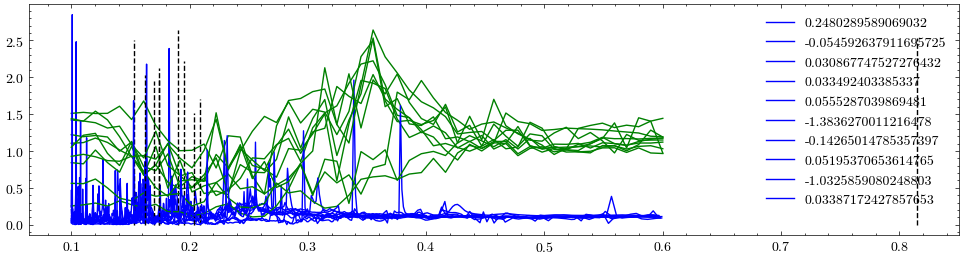

In [5]:
files = list_files(directory, pattern)
event_modes = []
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12,3))
file_axes = {}
for file in files:
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*", "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf["inputs"], decimate=data_conf["d"])
        outpts, dt = extract_channels(event, data_conf["outputs"], decimate=data_conf["d"])
        realization = ssid.system(method="srim", inputs=inputs, outputs=outpts, **conf)
    except Exception as e:
        print(e)
        continue
    ss_modes = modal.system_modes(realization,dt,nt=inputs.shape[1])
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    periods, amplitudes = spec.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    ax.plot(periods, 0.1*amplitudes, label=event["peak_accel"]/980.7, color="blue")
    periods, amplitudes = spec.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=np.linspace(*conf["period_band"],50), **conf)
    ax.plot(periods, amplitudes, color="green")
    ax.vlines([1/value["freq"] for value in ss_modes.values()][0],0,max(amplitudes),color='k',linestyles='dashed')
ax.legend()
event_frequencies = mode_statistics(event_modes, "freq")